In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("darkgrid")

#### Loading data
###### Data source:  https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw

In [2]:
df = pd.read_csv("ford.csv")
display(df.head())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0


#### checking the number of unique values in the 'model' column

In [3]:
print(df['model'].unique())

[' Fiesta' ' Focus' ' Puma' ' Kuga' ' EcoSport' ' C-MAX' ' Mondeo' ' Ka+'
 ' Tourneo Custom' ' S-MAX' ' B-MAX' ' Edge' ' Tourneo Connect'
 ' Grand C-MAX' ' KA' ' Galaxy' ' Mustang' ' Grand Tourneo Connect'
 ' Fusion' ' Ranger' ' Streetka' ' Escort' ' Transit Tourneo']


#### data filtering example of the car model 'Edge'

In [4]:
df_Edge = df[df['model'] == ' Edge']

display(df_Edge)
print(df_Edge.shape)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
79,Edge,2016,18640,Manual,24105,Diesel,48.7,2.0
338,Edge,2016,20799,Automatic,52000,Diesel,47.9,2.0
366,Edge,2018,19498,Manual,22068,Diesel,48.7,2.0
376,Edge,2017,23899,Automatic,27146,Diesel,47.9,2.0
482,Edge,2017,20994,Automatic,41000,Diesel,48.7,2.0
...,...,...,...,...,...,...,...,...
17524,Edge,2016,15000,Manual,52368,Diesel,48.7,2.0
17563,Edge,2017,19000,Manual,12798,Diesel,48.7,2.0
17883,Edge,2016,17999,Manual,21000,Diesel,48.7,2.0
17889,Edge,2018,25999,Automatic,19458,Diesel,47.9,2.0


(208, 8)


In [5]:
# find the average price of the ' Edge' model cars
df_Edge['price'].sum()/208

22810.5

#### Data Aggregation: groupby 'model'

In [17]:
df_agg_model = df.groupby('model')['price'].agg(['count', 'mean', 'sum'])

display(df_agg_model)

,count,mean,sum
model,,,
B-MAX,355,8287.526761,2942072
C-MAX,543,9914.567219,5383610
EcoSport,1143,12499.268591,14286664
Edge,208,22810.500000,4744584
Escort,1,3000.000000,3000
Fiesta,6556,10196.862569,66850631
Focus,4588,13185.882956,60496831
Fusion,16,2555.812500,40893
Galaxy,228,17841.872807,4067947


#### Sorting top 5 selling car models, their average and total price

In [18]:
df_agg_model.sort_values(by='count', ascending = False).head(5)

,count,mean,sum
model,,,
Fiesta,6556,10196.862569,66850631
Focus,4588,13185.882956,60496831
Kuga,2225,15823.472360,35207226
EcoSport,1143,12499.268591,14286664
C-MAX,543,9914.567219,5383610


### Barplot: Percentage of cars, Average and Total selling price of cars by model 
- What are the top 5 selling car models in the dataset?
- What's the average selling price of the top 5 selling car models?
- What's the total sale of the top 5 selling car models?

#### Data preprocessing before visualization

In [19]:
# sort the dataframe based on the column 'count'
df_agg_model = df_agg_model.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
df_agg_model['percent_of_cars'] = (df_agg_model['count']/df_agg_model['count'].sum())*100

# convert the 'sum' column in millions
df_agg_model['sum'] = df_agg_model['sum']/1000000

# keep up to two decimal points
df_agg_model = df_agg_model.round(2)

# remove the 'count' column
df_agg_model = df_agg_model.drop('count', axis=1)

display(df_agg_model.head())

,mean,sum,percent_of_cars
model,,,
Fiesta,10196.86,66.85,36.50
Focus,13185.88,60.50,25.54
Kuga,15823.47,35.21,12.39
EcoSport,12499.27,14.29,6.36
C-MAX,9914.57,5.38,3.02


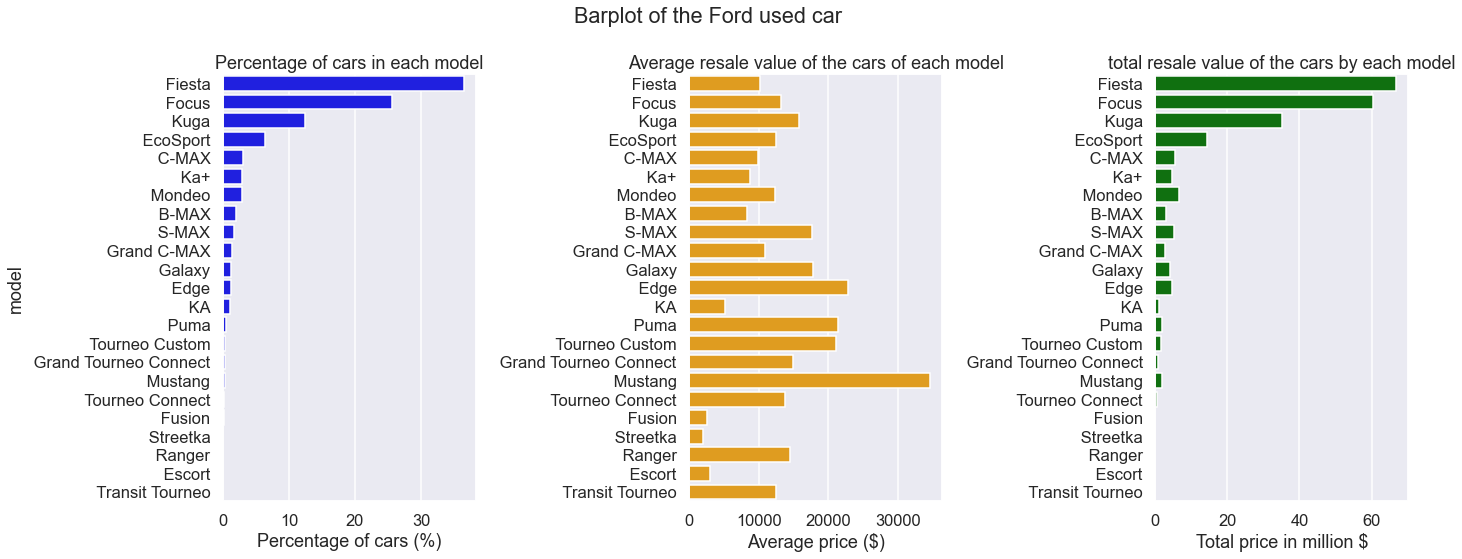

In [20]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg_model.index, data=df_agg_model, orient='h', color='blue')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")
# plt.grid()

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg_model.index, data=df_agg_model, orient='h', color='orange')
plt.title("Average resale value of the cars of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg_model.index, data=df_agg_model, orient='h', color='green')
plt.title("total resale value of the cars by each model")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the Ford used car")
plt.tight_layout()
plt.show()

#### Data Aggregation: groupby 'transmission'

In [10]:
df_agg_trans = df.groupby('transmission')['price'].agg(['count', 'mean', 'sum'])

display(df_agg_trans)

,count,mean,sum
transmission,,,
Automatic,1360,15734.022794,21398271
Manual,15517,11792.490043,182984068
Semi-Auto,1087,14919.034039,16216990


### Barplot: Percentage of cars, Average and Total selling price of cars by transmission
- What are the top 5 selling car models in the dataset?
- What's the average selling price of the top 5 selling car models?
- What's the total sale of the top 5 selling car models?

##### Data preprocessing before visualization

In [11]:
# sort the dataframe based on the column 'count'
df_agg_trans_trans = df_agg_trans.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
df_agg_trans['percent_of_cars'] = (df_agg_trans['count']/df_agg_trans['count'].sum())*100

# convert the 'sum' column in millions
df_agg_trans['sum'] = df_agg_trans['sum']/1000000

# keep up to two decimal points
df_agg_trans = df_agg_trans.round(2)

# remove the 'count' column
df_agg_trans = df_agg_trans.drop('count', axis=1)

display(df_agg_trans.head())

,mean,sum,percent_of_cars
transmission,,,
Automatic,15734.02,21.40,7.57
Manual,11792.49,182.98,86.38
Semi-Auto,14919.03,16.22,6.05


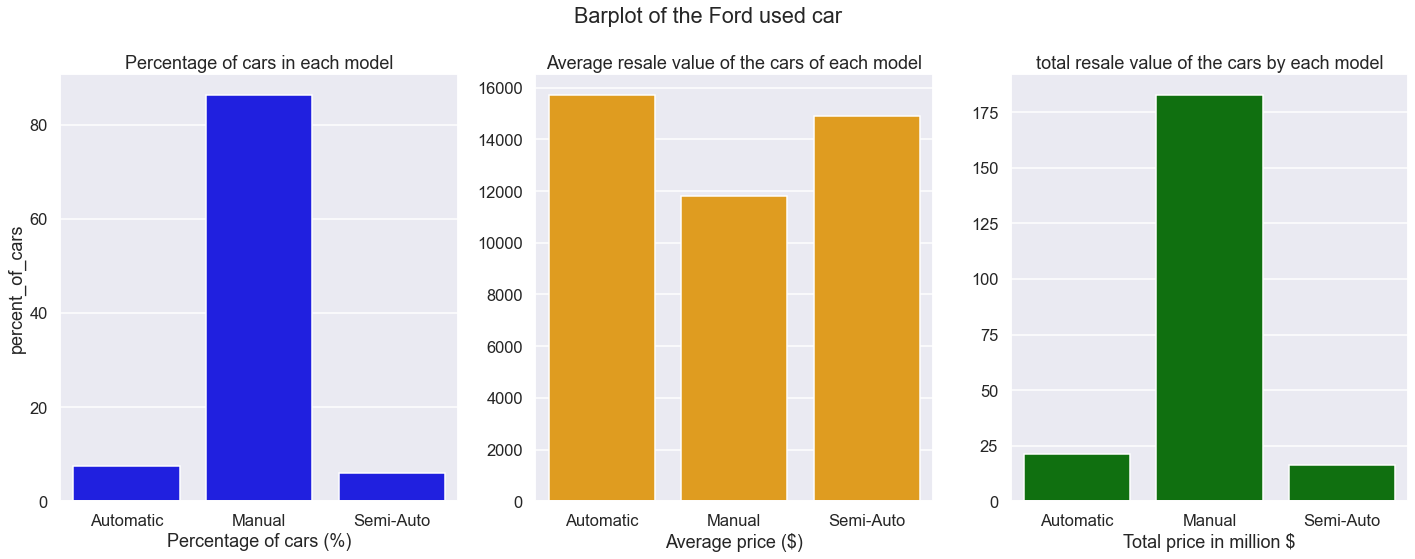

In [16]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x=df_agg_trans.index, y= 'percent_of_cars', orient = 'v', data=df_agg_trans, color='blue')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")
# plt.grid()

plt.subplot(1, 3, 2)
sns.barplot(x=df_agg_trans.index, y='mean', orient = 'v', data=df_agg_trans, color='orange')
plt.title("Average resale value of the cars of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x= df_agg_trans.index, y= 'sum', orient = 'v', data=df_agg_trans, color='green')
plt.title("total resale value of the cars by each model")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the Ford used car")
plt.tight_layout()
plt.show()

#### Data Aggregation: groupby 'fuelType'

In [13]:
df_agg_fueltype = df.groupby('fuelType')['price'].agg(['count', 'mean', 'sum'])

display(df_agg_fueltype)

,count,mean,sum
fuelType,,,
Diesel,5762,13659.173724,78704159
Electric,2,15737.500000,31475
Hybrid,22,22149.090909,487280
Other,1,13800.000000,13800
Petrol,12177,11608.985382,141362615


### Barplot: Percentage of cars, Average and Total selling price of cars by fuelType
- What are the top 5 selling car models in the dataset?
- What's the average selling price of the top 5 selling car models?
- What's the total sale of the top 5 selling car models?

#### Data preprocessing before visualization

In [14]:
# sort the dataframe based on the column 'count'
df_agg_fueltype = df_agg_fueltype.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
df_agg_fueltype['percent_of_cars'] = (df_agg_fueltype['count']/df_agg_fueltype['count'].sum())*100

# convert the 'sum' column in millions
df_agg_fueltype['sum'] = df_agg_fueltype['sum']/1000000

# keep up to two decimal points
df_agg_fueltype = df_agg_fueltype.round(2)

# remove the 'count' column
df_agg_fueltype = df_agg_fueltype.drop('count', axis=1)

display(df_agg_fueltype.head())

,mean,sum,percent_of_cars
fuelType,,,
Petrol,11608.99,141.36,67.79
Diesel,13659.17,78.70,32.08
Hybrid,22149.09,0.49,0.12
Electric,15737.50,0.03,0.01
Other,13800.00,0.01,0.01


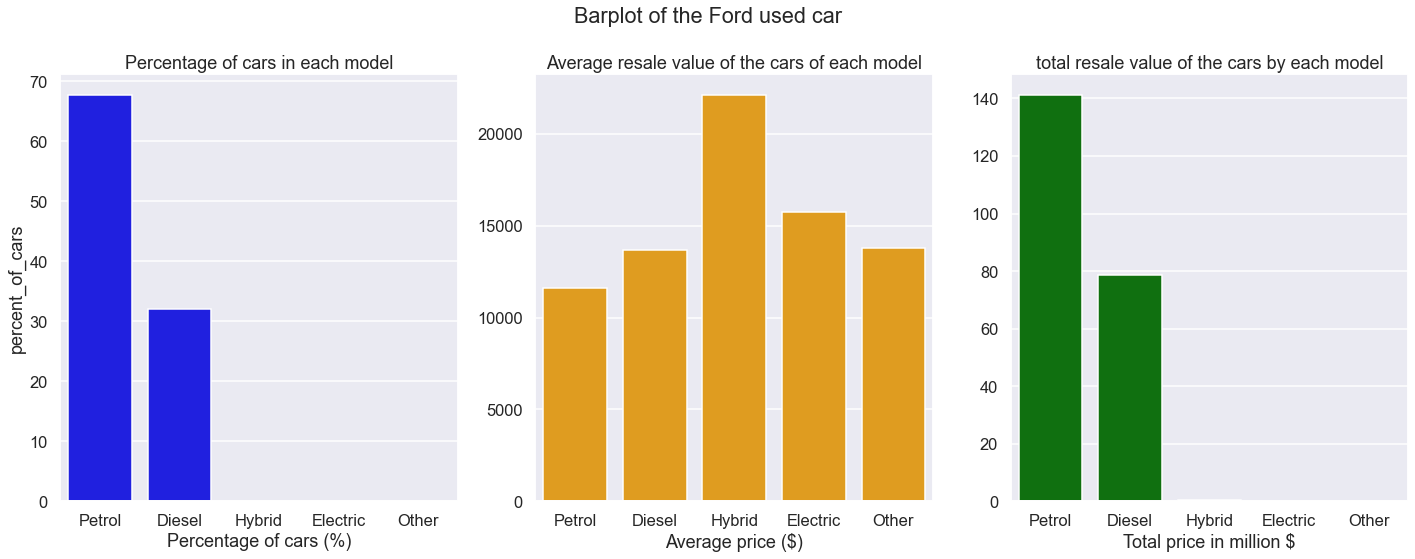

In [15]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x=df_agg_fueltype.index, y= 'percent_of_cars', orient = 'v', data=df_agg_fueltype, color='blue')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")
# plt.grid()

plt.subplot(1, 3, 2)
sns.barplot(x=df_agg_fueltype.index, y='mean', orient = 'v', data=df_agg_fueltype, color='orange')
plt.title("Average resale value of the cars of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x= df_agg_fueltype.index, y= 'sum', orient = 'v', data=df_agg_fueltype, color='green')
plt.title("total resale value of the cars by each model")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the Ford used car")
plt.tight_layout()
plt.show()